#codsoft

In [386]:
import numpy as np 
import pandas as pd 
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/genre-classification-dataset-imdb/__results__.html
/kaggle/input/genre-classification-dataset-imdb/__notebook__.ipynb
/kaggle/input/genre-classification-dataset-imdb/__output__.json
/kaggle/input/genre-classification-dataset-imdb/custom.css
/kaggle/input/genre-classification-dataset-imdb/__results___files/__results___18_0.png
/kaggle/input/d/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/d/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/d/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/d/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


In [387]:
train_data='/kaggle/input/d/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'
df=pd.read_csv(train_data,sep=':::',engine='python',names=['ID', 'TITLE ', 'GENRE' , 'DESCRIPTION'])

In [388]:
test_data='/kaggle/input/d/hijest/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
df2=pd.read_csv(test_data,sep=':::',engine='python',names=['ID', 'TITLE' ,'DESCRIPTION'])

In [389]:
df.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [390]:
df2.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


*PreProcessing**

In [391]:
df=df.drop(['ID','TITLE '],axis=1,errors='ignore')
df2=df2.drop(['ID','TITLE'],axis=1,errors='ignore')

In [392]:
df.isnull().sum()

GENRE          0
DESCRIPTION    0
dtype: int64

In [393]:
df2.isnull().sum()

DESCRIPTION    0
dtype: int64

In [394]:
df.describe()

,GENRE,DESCRIPTION
count,54214,54214
unique,27,54086
top,drama,Grammy - music award of the American academy ...
freq,13613,12


In [395]:
df.duplicated().sum()

109

In [396]:
df= df.drop_duplicates()

In [397]:
df2.duplicated().sum()

128

In [398]:
df2 = df2.drop_duplicates()

In [399]:
df2.duplicated().sum()

0

In [400]:
df.duplicated().sum()

0

In [401]:
df.dtypes

GENRE          object
DESCRIPTION    object
dtype: object

In [402]:
df2.dtypes

DESCRIPTION    object
dtype: object

In [403]:
X=df['DESCRIPTION']
y=df['GENRE']

In [404]:
xtest=df2['DESCRIPTION']

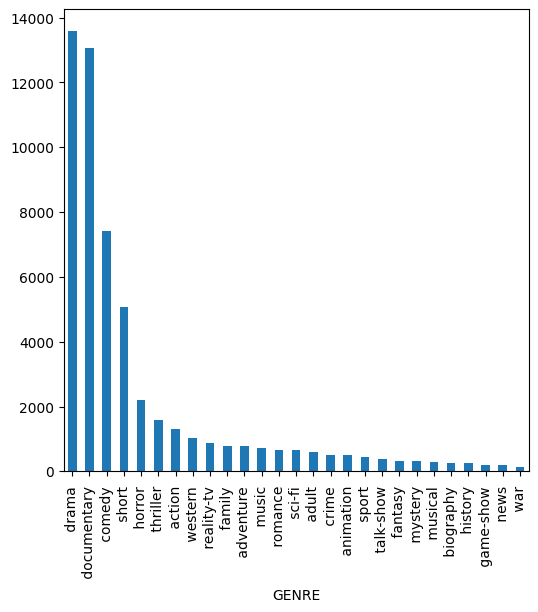

In [405]:
genre_value_counts=df['GENRE'].value_counts()
plt.figure(figsize=(6,6))
genre_value_counts.plot(kind='bar')
plt.title='Distribution of Movies Genre'
plt.xlabel='Genre' 
plt.ylabel='No. of Movies'
plt.show()

Cleaning Data

In [406]:
def cleaning_data(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r"\s+", " ", text).strip()
    return text
X = df['DESCRIPTION'].apply(cleaning_data)  
xtest = df2['DESCRIPTION'].apply(cleaning_data) 

*Splitting*

In [407]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

*Vectorizer*

In [408]:
print(type(x_train))  # Should be a pandas Series or list of strings
print(type(x_test))   # Should be a pandas Series or list of strings
print(type(xtest)) 

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [409]:
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)
xtest_transformed=tfidf.transform(xtest)

In [410]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [411]:
from sklearn.metrics import accuracy_score, r2_score
y_pred_x_test=model.predict(x_test)
accuracy_test=accuracy_score(y_test, y_pred_x_test)
print("Test accuracy:", accuracy_test)

Test accuracy: 0.5243507993715922


In [412]:
y_pred_xtest = model.predict(xtest_transformed)
if len(y_pred_xtest) == len(df['GENRE']):
    # حساب الدقة باستخدام القيم الحقيقية للبيانات الخارجية
    accuracy_external = accuracy_score(df['GENRE'], y_pred_xtest)
    print("Accuracy on external test data:", accuracy_external)
else:
    print(f"Mismatch in number of samples: Predictions ({len(y_pred_xtest)}), True labels ({len(df['GENRE'])})")

Mismatch in number of samples: Predictions (54072), True labels (54105)
